**Francis O'Hara**

Fall 2024

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a. Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [2]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b. Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c. Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

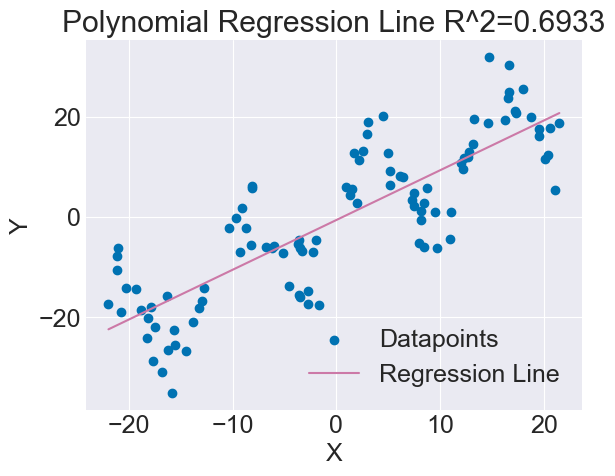

In [3]:
poly_data = data.Data("data/poly_data.csv")
lin_reg = linear_regression.LinearRegression(poly_data)
lin_reg.poly_regression("X", "Y", 1)

lin_reg.scatter("X", "Y", "Polynomial Regression Line")
plt.legend(["Datapoints", "Regression Line"]);

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

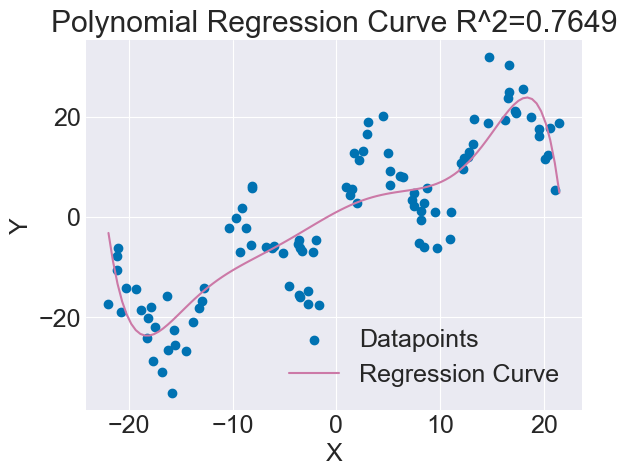

In [4]:
lin_reg = linear_regression.LinearRegression(poly_data)
lin_reg.poly_regression("X", "Y", 7)

lin_reg.scatter("X", "Y", "Polynomial Regression Curve")
plt.legend(["Datapoints", "Regression Curve"]);

### 3d. Questions

**Question 5:** Describe the `p=7` fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually to the shape of the regression curve and in relation to the data as you experiment with the polynomial degree between 1 and 7. 


**Question 7:** Create and interpret a plot showing the MSE values as the polynomial degree goes from 1 to 7.

**Answer 5:**  
The P=7 fit has an $R^2$ value of 0.7649 and is better than the P=1 fit which has an $R^2$ value of 0.6933.
This is because, the higher the degree of the polynomial being used to fit the data, the more curves will exist in the regression line, and hence the more the regression line can maneuver to pass through as many points in the dataset as possible and minimize its residual.


**Answer 6:**  
As you experiment with the polynomial degree from 1 to 7, the regression curve fits the data better and better. For every polynomial degree used between 1 and 7 $n$, the regression curve is able to pass through $n + 1$ data points.

**Answer 7:**  
The following code generates the desired plots below:

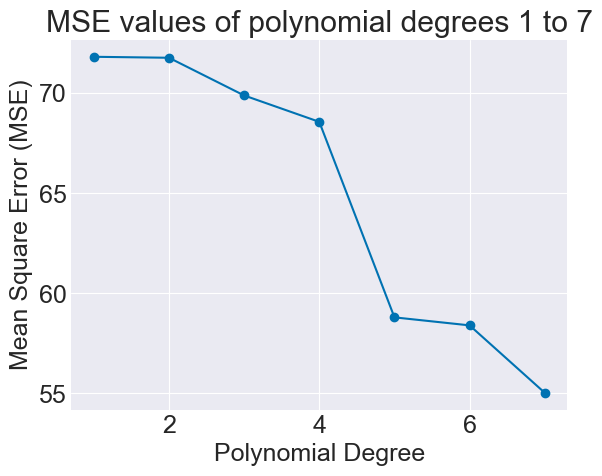

In [5]:
lin_reg = linear_regression.LinearRegression(poly_data)
degrees = range(1, 8)
mse_values = []

for degree in degrees:
    lin_reg.poly_regression("X", "Y", degree)
    mse_values.append(lin_reg.mse)

plt.plot(degrees, mse_values, marker="o")
plt.title("MSE values of polynomial degrees 1 to 7")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Square Error (MSE)")
plt.show()

The above plot indicates that as the degree of the polynomial increases, the mean square error value decreases. This is because the polynomial is able to better fit the data and results in smaller residuals as its degree increases.

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a. Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [6]:
fit_data = data.Data("data/poly_data.csv")
fit_data.limit_samples(0, 50)
val_data = data.Data("data/poly_data.csv")
val_data.limit_samples(50, 100)

print(f"Fit Data:\n{fit_data.head()}")
print(f"Validation Data:\n{val_data.head()}")



Fit Data:
[[ 2.147 11.382]
 [ 9.465  1.034]
 [ 4.52  20.251]
 [ 1.974  2.89 ]
 [-3.358 -6.809]]
Validation Data:
[[ -3.65   -4.658]
 [  9.69   -6.107]
 [-21.986 -17.271]
 [ -8.694  -2.22 ]
 [-15.536 -25.608]]


Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b. Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

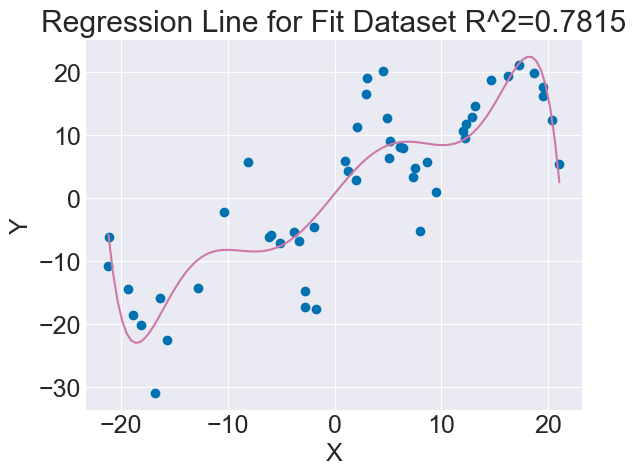

Fit MSE: 38.30258184051852


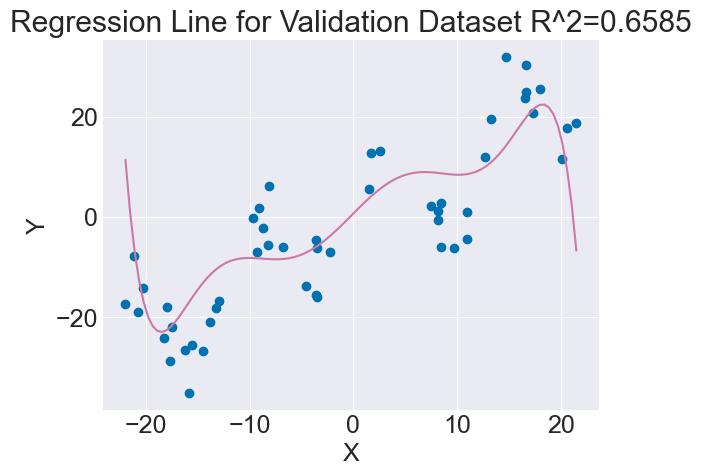

Validation MSE: 96.45877456854056


In [7]:
lin_reg_fit = linear_regression.LinearRegression(fit_data)
lin_reg_fit.poly_regression("X", "Y", 7)
lin_reg_fit.scatter("X", "Y", "Regression Line for Fit Dataset")
plt.show()
print(f"Fit MSE: {lin_reg_fit.mse}")

lin_reg_val = linear_regression.LinearRegression(val_data)
lin_reg_val.initialize(["X"], "Y", lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), 7)

lin_reg_val.scatter("X", "Y", "Regression Line for Validation Dataset")
plt.show()
print(f"Validation MSE: {lin_reg_val.mse}")



### 4c. Questions

**Question 8:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 9:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 10:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 11:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 8:**  
The fitted coefficients do a relatively good job at generalizing to the validation dataset, achieving an $R^2$ value of $0.6585$, which is only $0.123$ decrease in the $R^2$ value achieved with the training dataset.

**Answer 9:**  
The following code demonstrates how the generalization performs as the degree of the polynomial reduces:

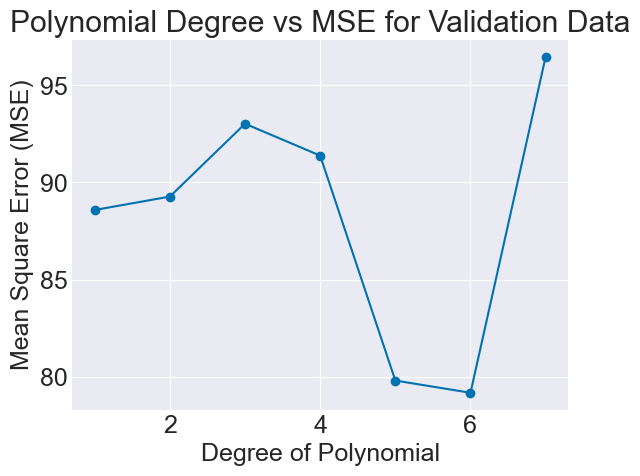

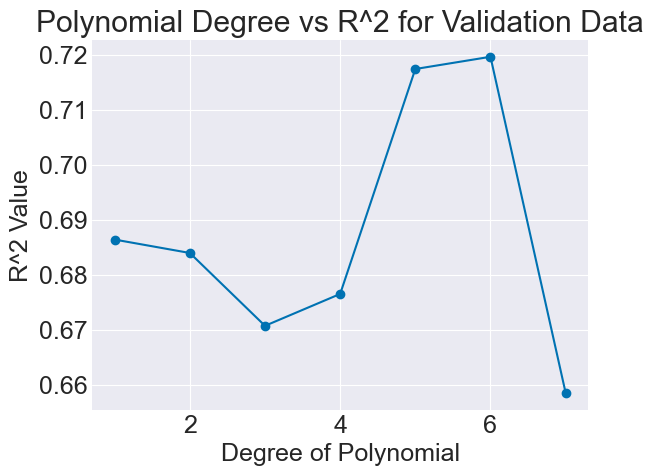

In [8]:
degrees = range(1,8)
mse_values = []
R2_values = []

for degree in degrees:
    lin_reg_fit.poly_regression("X", "Y", degree)
    lin_reg_val.initialize(["X"], "Y", lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), degree)
    mse_values.append(lin_reg_val.mse)
    R2_values.append(lin_reg_val.R2)

plt.plot(degrees, mse_values, marker="o")
plt.title("Polynomial Degree vs MSE for Validation Data")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Square Error (MSE)")
plt.show()

plt.plot(degrees, R2_values, marker="o")
plt.title("Polynomial Degree vs R^2 for Validation Data")
plt.xlabel("Degree of Polynomial")
plt.ylabel("R^2 Value")
plt.show()

Based on the plots above, the generalization greatly improves for polynomial degree 6, achieving the highest $R^2$ value of about $0.72$, and the lowest MSE value of about $79$. The generalization then gets worse as the polynomial degree decreases from 6, but still attains better $R^2$ and $MSE$ values than the polynomial of degree 7.
Hence, overall, the generalization improves for polynomials of degree < 7.

**Answer 10:**
Based on the $R^2$ and MSE values from our previous answer, a polynomial of degree 6 generalizes acceptably to the validation dataset. This is because going above a polynomial of degree 6 results in overfitting to the training dataset and going below that results in underfitting.


**Answer 11:**  
The following code cell demonstrates the effect of increasing the polynomial degree beyond 7 on the $R^2$ and MSE values:

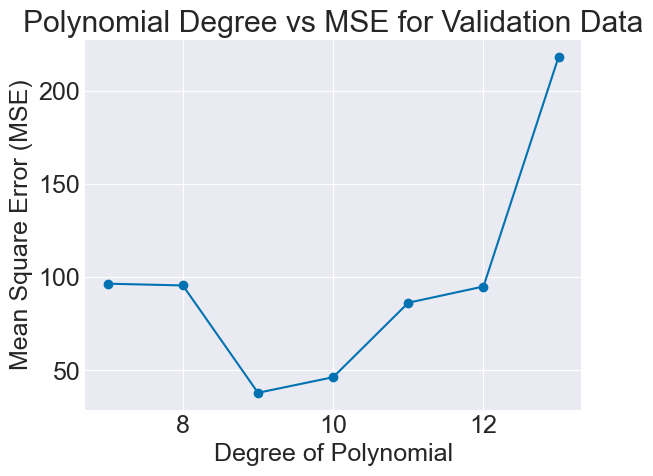

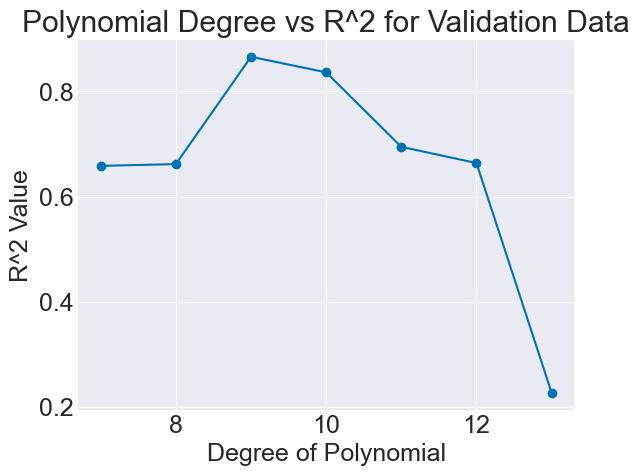

In [9]:
degrees = range(7, 14)
mse_values = []
R2_values = []

for degree in degrees:
    lin_reg_fit.poly_regression("X", "Y", degree)
    lin_reg_val.initialize(["X"], "Y", lin_reg_fit.get_fitted_slope(), lin_reg_fit.get_fitted_intercept(), degree)
    mse_values.append(lin_reg_val.mse)
    R2_values.append(lin_reg_val.R2)

plt.plot(degrees, mse_values, marker="o")
plt.title("Polynomial Degree vs MSE for Validation Data")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Square Error (MSE)")
plt.show()

plt.plot(degrees, R2_values, marker="o")
plt.title("Polynomial Degree vs R^2 for Validation Data")
plt.xlabel("Degree of Polynomial")
plt.ylabel("R^2 Value")
plt.show()

lin_reg_fit.poly_regression("X", "Y", degree)

Based on the plots above, as the degree of the polynomial increases from 7 to 13, the generalization improves and then drastically worsens. The best MSE and $R^2$ values are attained for the polynomial of degree 9 with MSE of about 46 and an $R^2$ value of about 0.83.
This change in the goodness of the generalization is likely dependent on the pattern of the validation data itself, so the validation data is likely better fit by polynomials of degree 6 and 9 but not by other polynomial degrees.

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.